# Activity 2.1 : Convolutional Neural Network

Hernandez, Eujean Marie T. <br> CPE32SS8

#### Objective(s):

This activity aims to introduce how to build a convolutional neural network

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train convolutional neural network
* Evaluate the accuracy and loss of the model using convolutional neural network

#### Resources:
* Jupyter Notebook
* CIFAR-10 dataset

#### Procedures
Load the necessary libraries

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

* Shuffle the data
* Split the data into train and test sets

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Check the image size

In [ ]:
x_train[444].shape

(32, 32, 3)

Visualize one of the images

[9]


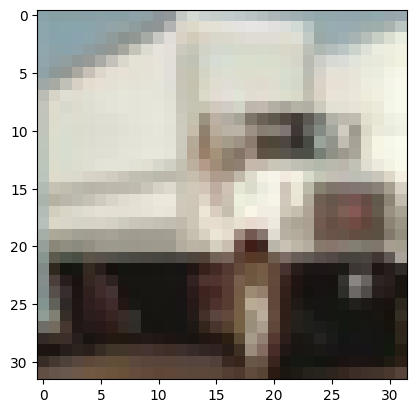

In [ ]:
print(y_train[444])
plt.imshow(x_train[444]);

In [ ]:
num_classes = 10


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position

In [ ]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Convert to float and scale the datasets

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Build a CNN using Keras Sequential

In [ ]:

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_1 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 32)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                        

* Use batch size of 32
* Initiate RMSprop optimizer
* Train the model using RMSprop

In [ ]:
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0005)


model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 [==============================] - 27s 17ms/step - loss: 1.7189 - accuracy: 0.3748 - val_loss: 1.4710 - val_accuracy: 0.4777
Epoch 2/15
1563/1563 [==============================] - 28s 18ms/step - loss: 1.4354 - accuracy: 0.4866 - val_loss: 1.2847 - val_accuracy: 0.5427
Epoch 3/15
1563/1563 [==============================] - 27s 17ms/step - loss: 1.3525 - accuracy: 0.5223 - val_loss: 1.2850 - val_accuracy: 0.5460
Epoch 4/15
1563/1563 [==============================] - 28s 18ms/step - loss: 1.3104 - accuracy: 0.5411 - val_loss: 1.3950 - val_accuracy: 0.5158
Epoch 5/15
1563/1563 [==============================] - 26s 17ms/step - loss: 1.2850 - accuracy: 0.5523 - val_loss: 1.2302 - val_accuracy: 0.5680
Epoch 6/15
1563/1563 [==============================] - 26s 17ms/step - loss: 1.2728 - accuracy: 0.5587 - val_loss: 1.3133 - val_accuracy: 0.5504
Epoch 7/15
1563/1563 [==============================] - 28s 18ms/step - loss: 1.2639 - accuracy: 0.5649 - val_loss: 1.2408 -

In [ ]:
score = model_1.evaluate(x_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 1.2035566568374634
Train accuracy: 0.5950400233268738


In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('Cross Entropy Loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('Accuracy')
    ax.grid(True)

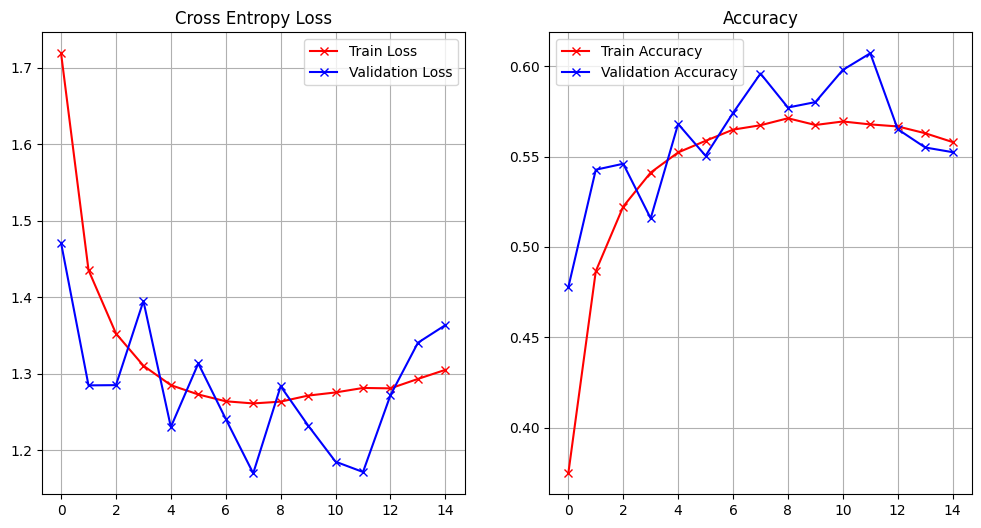

In [ ]:
plot_loss_accuracy(history)

#### Supplementary Activity

* Build a more complicated model with the following pattern:
Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

* Use strides of 1 for all convolutional layers.

* Write the number of parameters of your model  and compare it to the previous model

* Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?

* Use different structures and run times, and see how accurate your model can be.

**Build a more complicated model with the following pattern: Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification**

In [ ]:
model_2 = Sequential()

## 5x5 convolution with 2x2 stride and 32 filters
model_2.add(Conv2D(32, (5, 5), strides = (1,1), padding='same', input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))

#Convolution
model_2.add(Conv2D(32, (5, 5), strides = (1,1)))
model_2.add(Activation('relu'))

#Max pooling
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

#Convolution
model_2.add(Conv2D(32, (5, 5), strides = (1,1)))
model_2.add(Activation('relu'))

#Convolution
model_2.add(Conv2D(32, (5, 5), strides = (1,1)))
model_2.add(Activation('relu'))

#MaxPool
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

## Flatten
model_2.add(Flatten())
model_2.add(Dense(512, activation = 'relu'))

#Final Classification
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 activation_9 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        25632     
                                                                 
 activation_10 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 14, 14, 32)        0         
                                                      

**Write the number of parameters of your model and compare it to the previous model**

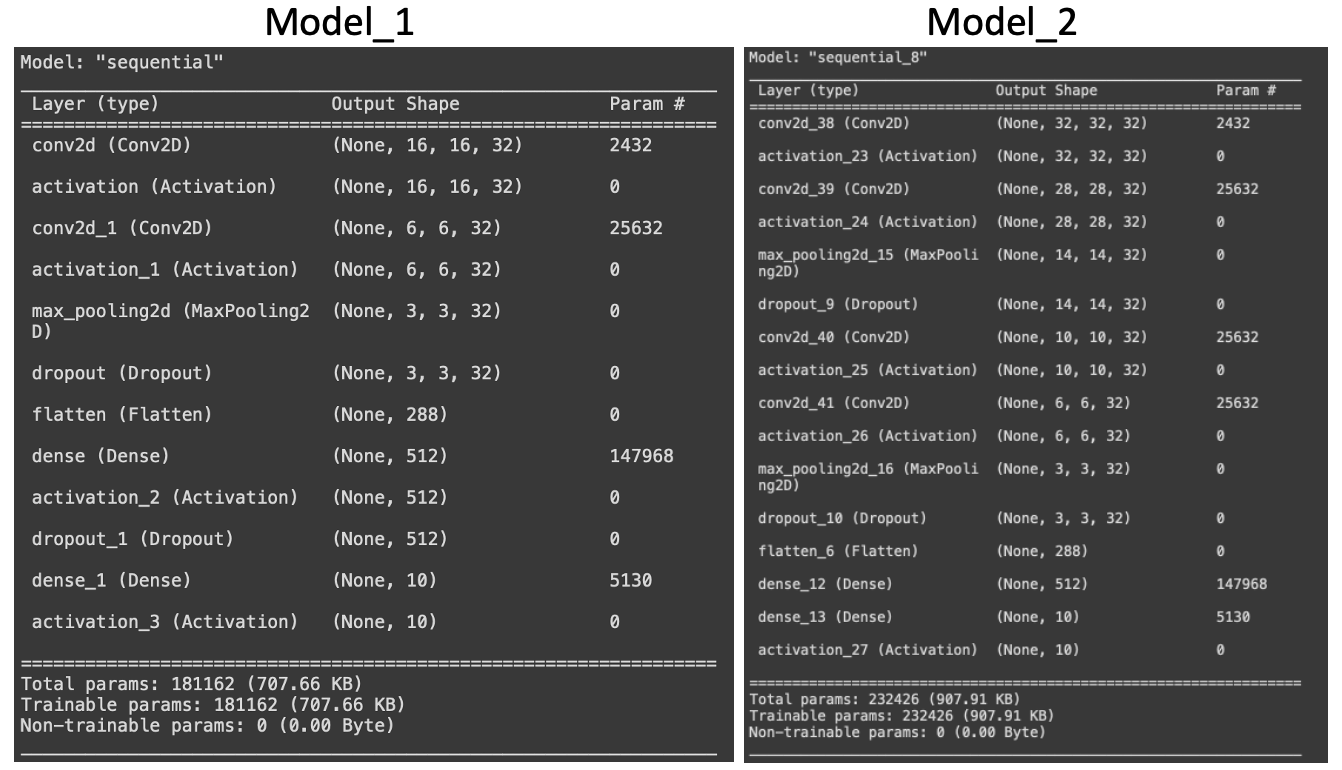

The model_2 has a total of 232,426 parameters which is trainable. The model_2 has more parameters than model_1 because of the additional convolutional layers. They have identical number of parameters in dense and with the convolutional layer.

Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?

In [ ]:
batch_size = 32
epoch = 5
opt = keras.optimizers.RMSprop(learning_rate=0.0005)


model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 346s 221ms/step - loss: 1.6461 - accuracy: 0.3992 - val_loss: 1.3346 - val_accuracy: 0.5170
Epoch 2/5
1563/1563 [==============================] - 329s 211ms/step - loss: 1.2928 - accuracy: 0.5371 - val_loss: 1.1991 - val_accuracy: 0.5816
Epoch 3/5
1563/1563 [==============================] - 331s 212ms/step - loss: 1.1495 - accuracy: 0.5925 - val_loss: 1.0975 - val_accuracy: 0.6036
Epoch 4/5
1563/1563 [==============================] - 325s 208ms/step - loss: 1.0526 - accuracy: 0.6284 - val_loss: 1.0562 - val_accuracy: 0.6218
Epoch 5/5
1563/1563 [==============================] - 324s 207ms/step - loss: 0.9888 - accuracy: 0.6537 - val_loss: 0.9261 - val_accuracy: 0.6762


In [ ]:
# Evaluate model_2

score_model_2 = model_2.evaluate(x_train, y_train, verbose=0)
print('\tModel 2')
print('Train loss:', score_model_2[0])
print('Train accuracy:', score_model_2[1])

	Model 2
Train loss: 0.8364723324775696
Train accuracy: 0.7031000256538391


In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

Using SGD Optimizer

In [ ]:
from keras.optimizers import SGD

model_2.compile(loss='categorical_crossentropy',
                optimizer=SGD(learning_rate=0.0005),
                metrics=['accuracy'])


batch_size = 32
epoch = 5
history2 = model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 333s 212ms/step - loss: 0.8338 - accuracy: 0.7058 - val_loss: 0.8421 - val_accuracy: 0.7073
Epoch 2/5
1563/1563 [==============================] - 329s 211ms/step - loss: 0.8180 - accuracy: 0.7111 - val_loss: 0.8350 - val_accuracy: 0.7071
Epoch 3/5
1563/1563 [==============================] - 327s 209ms/step - loss: 0.8141 - accuracy: 0.7133 - val_loss: 0.8353 - val_accuracy: 0.7054
Epoch 4/5
1563/1563 [==============================] - 331s 212ms/step - loss: 0.8067 - accuracy: 0.7146 - val_loss: 0.8381 - val_accuracy: 0.7048
Epoch 5/5
1563/1563 [==============================] - 327s 209ms/step - loss: 0.8015 - accuracy: 0.7163 - val_loss: 0.8265 - val_accuracy: 0.7108


	Model 2
Train loss: 0.7281686067581177
Train accuracy: 0.7445999979972839


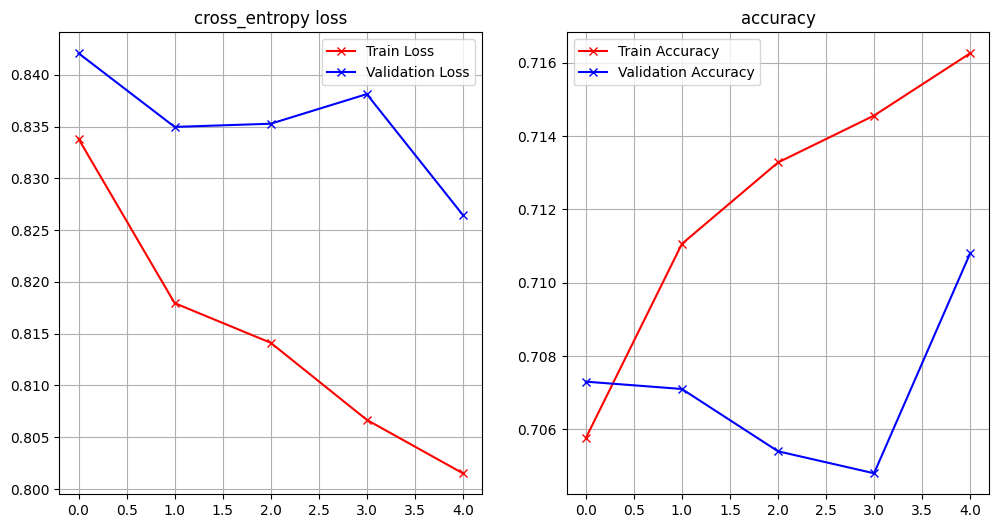

In [ ]:
# Evaluate model_2

score_model_2 = model_2.evaluate(x_train, y_train, verbose=0)
print('\tModel 2')
print('Train loss:', score_model_2[0])
print('Train accuracy:', score_model_2[1])

plot_loss_accuracy(history2)

Using Adam Optimizer

In [ ]:
from keras.optimizers import Adam

batch_size = 32
epochs = 5

model_2.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.0005),
                metrics=['accuracy'])

history3 = model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_train, y_train))


Epoch 1/5
1563/1563 [==============================] - 403s 257ms/step - loss: 1.6559 - accuracy: 0.3873 - val_loss: 1.3511 - val_accuracy: 0.5110
Epoch 2/5
1563/1563 [==============================] - 374s 239ms/step - loss: 1.3136 - accuracy: 0.5262 - val_loss: 1.1199 - val_accuracy: 0.6063
Epoch 3/5
1563/1563 [==============================] - 386s 247ms/step - loss: 1.1736 - accuracy: 0.5828 - val_loss: 1.0315 - val_accuracy: 0.6340
Epoch 4/5
1563/1563 [==============================] - 388s 248ms/step - loss: 1.0790 - accuracy: 0.6179 - val_loss: 0.9490 - val_accuracy: 0.6636
Epoch 5/5
1563/1563 [==============================] - 386s 247ms/step - loss: 1.0017 - accuracy: 0.6434 - val_loss: 0.8591 - val_accuracy: 0.7050


	Model 2
Train loss: 0.8591361045837402
Train accuracy: 0.7049800157546997


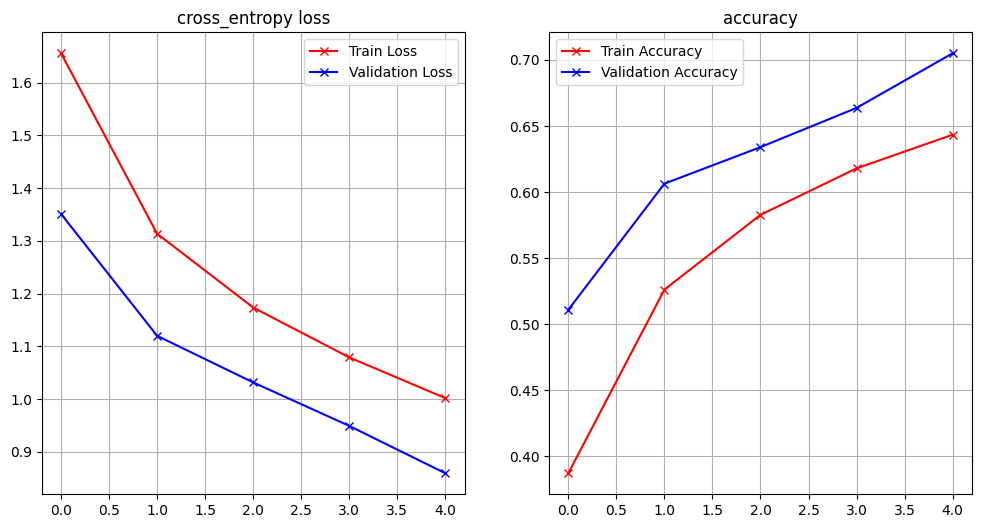

In [ ]:
# Evaluate model_2

score_model_2 = model_2.evaluate(x_train, y_train, verbose=0)
print('\tModel 2')
print('Train loss:', score_model_2[0])
print('Train accuracy:', score_model_2[1])

plot_loss_accuracy(history3)

In [ ]:
# Create a new Sequential model
model_3 = Sequential()

# Convolutional layers
model_3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_3.add(Conv2D(64, (3, 3), activation='relu'))
model_3.add(Conv2D(128, (3, 3), activation='relu'))
model_3.add(Conv2D(256, (3, 3), activation='relu'))

#MaxPooling layers
model_3.add(MaxPooling2D(pool_size=(2, 2)))

#Dropout layer
model_3.add(Dropout(0.25))

# Flatten the output
model_3.add(Flatten())

#Dense layers
model_3.add(Dense(512, activation='relu'))
model_3.add(Dense(256, activation='relu'))

# Output layer
model_3.add(Dense(10, activation='softmax'))


In [ ]:
# Display the model summary
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 256)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 256)       0         
                                                      

In [ ]:
from keras.optimizers import Adam

model_3.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.01),
                metrics=['accuracy'])

# Train the model
history4 = model_3.fit(x_train, y_train,
                      batch_size=64,
                      epochs=7,
                      validation_data=(x_test, y_test))

Epoch 1/7
782/782 [==============================] - 2204s 3s/step - loss: 2.9151 - accuracy: 0.0969 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 2/7
782/782 [==============================] - 2211s 3s/step - loss: 2.3035 - accuracy: 0.1001 - val_loss: 2.3033 - val_accuracy: 0.1000
Epoch 3/7
782/782 [==============================] - 2175s 3s/step - loss: 2.3035 - accuracy: 0.0980 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 4/7
782/782 [==============================] - 2190s 3s/step - loss: 2.3035 - accuracy: 0.1008 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 5/7
782/782 [==============================] - 2185s 3s/step - loss: 2.3036 - accuracy: 0.0993 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 6/7
782/782 [==============================] - 2193s 3s/step - loss: 2.3036 - accuracy: 0.0983 - val_loss: 2.3044 - val_accuracy: 0.1000
Epoch 7/7
782/782 [==============================] - 2231s 3s/step - loss: 2.3035 - accuracy: 0.1015 - val_loss: 2.3033 - val_accuracy: 0.1000

In [ ]:
# Evaluate model_3

score_model_3 = model_3.evaluate(x_train, y_train, verbose=0)
print('\tModel 3')
print('Train loss:', score_model_3[0])
print('Train accuracy:', score_model_3[1])

	Model 3
Train loss: 2.30332350730896
Train accuracy: 0.10000000149011612


In [ ]:
model_4 = Sequential()

model_4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_4.add(MaxPooling2D(pool_size=(2, 2)))

model_4.add(Conv2D(64, (3, 3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))

model_4.add(Flatten())
model_4.add(Dense(512, activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(10, activation='softmax'))


model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_6 (Dense)             (None, 512)              

In [ ]:
from keras.optimizers import SGD

model_4.compile(loss='categorical_crossentropy',
                optimizer=SGD(learning_rate=0.001),
                metrics=['accuracy'])


batch_size = 128
epoch = 5
history5 = model_4.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_test, y_test))

Epoch 1/5
391/391 [==============================] - 77s 195ms/step - loss: 2.3105 - accuracy: 0.1054 - val_loss: 2.2912 - val_accuracy: 0.1105
Epoch 2/5
391/391 [==============================] - 76s 195ms/step - loss: 2.2935 - accuracy: 0.1201 - val_loss: 2.2795 - val_accuracy: 0.1529
Epoch 3/5
391/391 [==============================] - 74s 188ms/step - loss: 2.2800 - accuracy: 0.1398 - val_loss: 2.2676 - val_accuracy: 0.1756
Epoch 4/5
391/391 [==============================] - 76s 195ms/step - loss: 2.2677 - accuracy: 0.1555 - val_loss: 2.2539 - val_accuracy: 0.1926
Epoch 5/5
391/391 [==============================] - 75s 191ms/step - loss: 2.2543 - accuracy: 0.1689 - val_loss: 2.2368 - val_accuracy: 0.2131


In [ ]:
# Evaluate model_3

score_model_4 = model_4.evaluate(x_train, y_train, verbose=0)
print('\tModel 3')
print('Train loss:', score_model_4[0])
print('Train accuracy:', score_model_4[1])

	Model 3
Train loss: 2.23642897605896
Train accuracy: 0.2182600051164627


In [ ]:
model_5 = Sequential()

## 5x5 convolution with 2x2 stride and 32 filters
model_5.add(Conv2D(512, (5, 5), strides = (1,1), padding='same', input_shape=x_train.shape[1:]))
model_5.add(Activation('relu'))

#Convolution
model_5.add(Conv2D(512, (5, 5), strides = (1,1)))
model_5.add(Activation('relu'))

#Max pooling
model_5.add(MaxPooling2D(pool_size=(2, 2)))
model_5.add(Dropout(0.25))

#Convolution
model_5.add(Conv2D(256, (5, 5), strides = (1,1)))
model_5.add(Activation('relu'))

#Convolution
model_5.add(Conv2D(256, (5, 5), strides = (1,1)))
model_5.add(Activation('relu'))

#MaxPool
model_5.add(MaxPooling2D(pool_size=(2, 2)))
model_5.add(Dropout(0.25))

## Flatten
model_5.add(Flatten())
model_5.add(Dense(512, activation = 'relu'))

#Final Classification
model_5.add(Dense(num_classes))
model_5.add(Activation('softmax'))

model_5.summary()


In [ ]:
from keras.optimizers import SGD

model_5.compile(loss='categorical_crossentropy',
                optimizer=SGD(learning_rate=0.0001),
                metrics=['accuracy'])


batch_size = 128
epoch = 10
history5 = model_5.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_test, y_test))

Epoch 1/10


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation
from keras.optimizers import Adam

model_6 = Sequential()

model_6.add(Conv2D(512, (5, 5), strides=(1, 1), padding='same', input_shape=x_train.shape[1:]))
model_6.add(Activation('relu'))

model_6.add(Conv2D(512, (5, 5), strides=(1, 1)))
model_6.add(Activation('relu'))

model_6.add(MaxPooling2D(pool_size=(2, 2)))
model_6.add(Dropout(0.25))

model_6.add(Conv2D(256, (5, 5), strides=(1, 1)))
model_6.add(Activation('relu'))

model_6.add(Conv2D(256, (5, 5), strides=(1, 1)))
model_6.add(Activation('relu'))

model_6.add(MaxPooling2D(pool_size=(2, 2)))
model_6.add(Dropout(0.25))

model_6.add(Flatten())
model_6.add(Dense(512, activation='relu'))
model_6.add(Dropout(0.5))

model_6.add(Dense(num_classes))
model_6.add(Activation('softmax'))

model_6.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 512)       38912     
                                                                 
 activation (Activation)     (None, 32, 32, 512)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 512)       6554112   
                                                                 
 activation_1 (Activation)   (None, 28, 28, 512)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 512)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 512)       0         
                                                      

In [ ]:
model_6.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

# Training
history_6 = model_6.fit(x_train, y_train,
                    batch_size=128,
                    epochs=50,  # You may need to train for more epochs
                    validation_data=(x_test, y_test))

Epoch 1/50
 17/391 [>.............................] - ETA: 8:24:38 - loss: 2.6564 - accuracy: 0.0965

In [ ]:
model_7 = Sequential()


model_7.add(Conv2D(64, (5, 5), strides = (1,1), padding='same', input_shape=x_train.shape[1:]))
model_7.add(Conv2D(64, (5, 5), strides = (1,1), padding='same', activation ='relu'))
model_7.add(MaxPooling2D(pool_size=(2, 2)))
model_7.add(Dropout(0.25))


model_7.add(Conv2D(64, (5, 5), strides = (1,1), padding='same', activation='relu'))
model_7.add(Conv2D(64, (5, 5), strides = (1,1), padding='same', activation='relu'))
model_7.add(MaxPooling2D(pool_size=(2, 2)))
model_7.add(Dropout(0.25))

## Flatten
model_7.add(Flatten())
model_7.add(Dense(512, activation = 'relu'))

#Final Classification
model_7.add(Dense(num_classes))
model_7.add(Activation('softmax'))

model_7.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 64)        4864      
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 64)        102464    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 64)        102464    
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 64)        102464    
                                                      

In [ ]:
from keras.optimizers import SGD

model_7.compile(loss='categorical_crossentropy',
                optimizer=SGD(learning_rate=0.0001),
                metrics=['accuracy'])


batch_size = 128
epoch = 10
history7 = model_7.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 1197s 3s/step - loss: 2.3098 - accuracy: 0.0969 - val_loss: 2.3006 - val_accuracy: 0.0980
Epoch 2/10
391/391 [==============================] - 1213s 3s/step - loss: 2.3049 - accuracy: 0.0977 - val_loss: 2.2986 - val_accuracy: 0.0999
Epoch 3/10
391/391 [==============================] - 1190s 3s/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.2974 - val_accuracy: 0.1075
Epoch 4/10
391/391 [==============================] - 1188s 3s/step - loss: 2.3005 - accuracy: 0.1003 - val_loss: 2.2962 - val_accuracy: 0.1232
Epoch 5/10
391/391 [==============================] - 1188s 3s/step - loss: 2.2994 - accuracy: 0.1036 - val_loss: 2.2952 - val_accuracy: 0.1370
Epoch 6/10
391/391 [==============================] - 1172s 3s/step - loss: 2.2983 - accuracy: 0.1072 - val_loss: 2.2941 - val_accuracy: 0.1390
Epoch 7/10
391/391 [==============================] - 1192s 3s/step - loss: 2.2971 - accuracy: 0.1073 - val_loss: 2.2931 - val_accuracy:

In [ ]:
# Evaluate model_3

score_model_7 = model_7.evaluate(x_train, y_train, verbose=0)
print('\tModel 7')
print('Train loss:', score_model_7[0])
print('Train accuracy:', score_model_7[1])

	Model 7
Train loss: 2.2900052070617676
Train accuracy: 0.12984000146389008


In [ ]:
model_8 = Sequential()


model_8.add(Conv2D(16, (3,3), strides = 1, padding='same', input_shape=x_train.shape[1:]))
model_8.add(Conv2D(16, (3,3), strides = 1, padding='same', activation ='relu'))
model_8.add(MaxPooling2D(pool_size=(2, 2)))
model_8.add(Dropout(0.25))

model_8.add(Conv2D(24, (3,3), strides = 1, padding='same', activation='relu'))
model_8.add(Conv2D(24, (3,3), strides = 1, padding='same', activation='relu'))
model_8.add(MaxPooling2D(pool_size=(2, 2)))
model_8.add(Dropout(0.25))

## Flatten
model_8.add(Flatten())
model_8.add(Dense(512, activation = 'relu'))

#Final Classification
model_8.add(Dense(num_classes))
model_8.add(Activation('softmax'))

model_8.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_23 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 16, 16, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_9 (Dropout)         (None, 16, 16, 16)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 16, 16, 24)        3480      
                                                                 
 conv2d_25 (Conv2D)          (None, 16, 16, 24)        5208      
                                                      

In [ ]:
from keras.optimizers import SGD

model_8.compile(loss='categorical_crossentropy',
                optimizer=SGD(learning_rate=0.0005),
                metrics=['accuracy'])

batch_size = 128
epoch = 5
history8 = model_8.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_test, y_test))

Epoch 1/5
391/391 [==============================] - 110s 280ms/step - loss: 2.3037 - accuracy: 0.1020 - val_loss: 2.2935 - val_accuracy: 0.1138
Epoch 2/5
391/391 [==============================] - 104s 265ms/step - loss: 2.2957 - accuracy: 0.1107 - val_loss: 2.2892 - val_accuracy: 0.1451
Epoch 3/5
391/391 [==============================] - 103s 262ms/step - loss: 2.2908 - accuracy: 0.1185 - val_loss: 2.2845 - val_accuracy: 0.1538
Epoch 4/5
391/391 [==============================] - 107s 273ms/step - loss: 2.2847 - accuracy: 0.1283 - val_loss: 2.2785 - val_accuracy: 0.1621
Epoch 5/5
391/391 [==============================] - 103s 262ms/step - loss: 2.2782 - accuracy: 0.1389 - val_loss: 2.2706 - val_accuracy: 0.1794


Conclusion

In this activity, we explored the process of training convolutional neural networks (CNNs) for image classification tasks. I experimented with different CNN architectures, including convolutional layers, pooling layers, dropout layers, and dense layers. Running this process took a lot of time. Model 1 has 181,162 parameters and achieved an accuracy of 59%.  Model 2 has a total of 232,426 parameters. In Model 2, I tried three different optimizers such as RMSprop, SGD, and Adam to determine which one would yield the highest accuracy. After running the three optimizers, SGD achieved the highest accuracy at 71%. I also tuned and experimented with the parameters and layer structure to assess the performance of the model, but I observed a decrease in accuracy, and it took additional time to complete the execution.

Google Colab Link: https://colab.research.google.com/drive/1IQpyKZ06Xf2ofQeaslC1mZ9DqtfRsgzu#scrollTo=xwvMhEkAlKfN